## Cross Validation con Regresión Logistica

In [ ]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435823, 19)

Validación Cruzada (Acuracidad) - Media: 0.6875, Desviación Estándar: 0.0004
Resultados en el Conjunto de Prueba:
Accuracy: 0.6881
Precision: 0.6246
Recall: 0.6427
F1-Score: 0.6335
AUC (Prueba): 0.7155
Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.74      0.72      0.73   1120839
           1       0.62      0.64      0.63    809908

    accuracy                           0.69   1930747
   macro avg       0.68      0.68      0.68   1930747
weighted avg       0.69      0.69      0.69   1930747



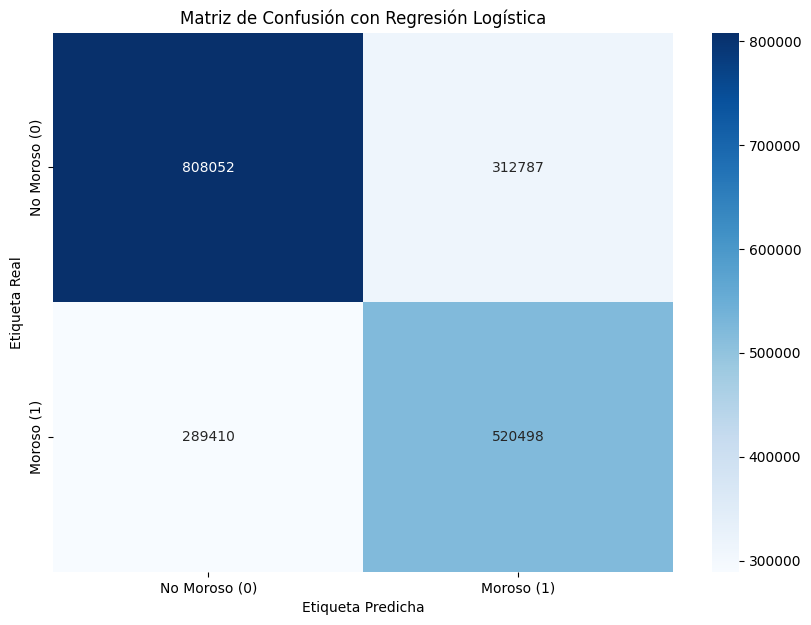

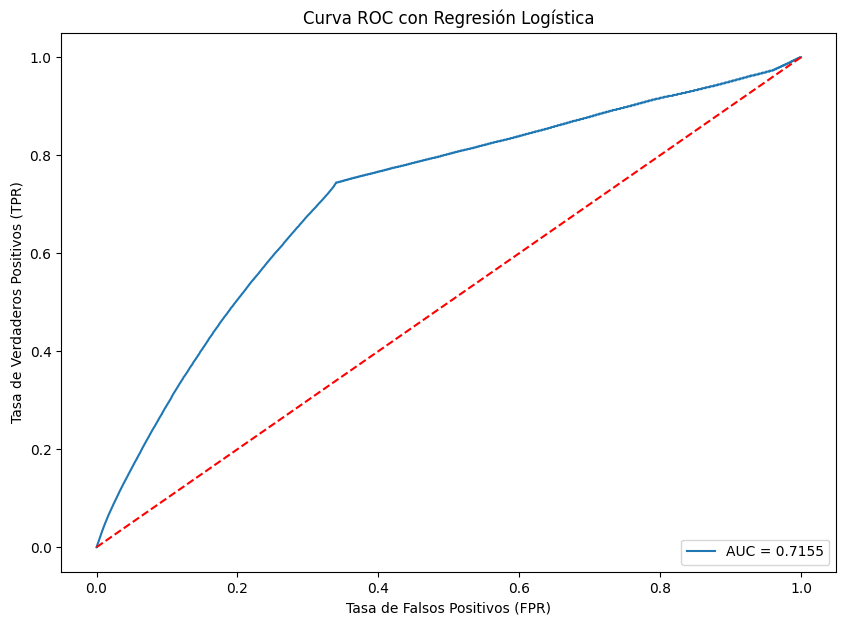

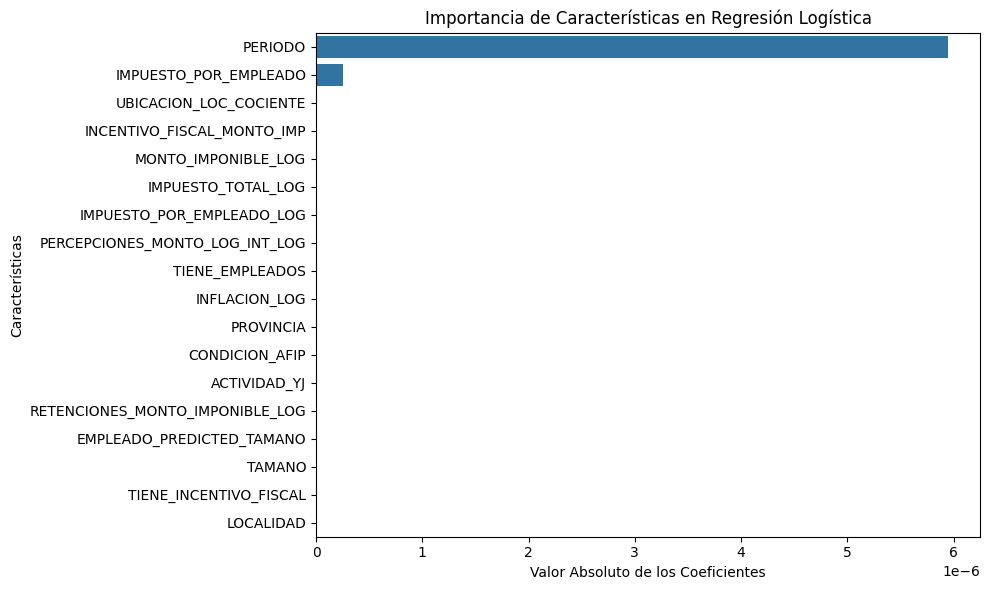

El tiempo total de ejecución fue de 1 minutos y 35.57 segundos.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Registro del tiempo de inicio
start_time = time.time()

# Definir las características y la variable objetivo
X = dataset_work_3.drop(columns=["MOROSIDAD"])
y = dataset_work_3["MOROSIDAD"]

# Separar el dataset en conjunto de entrenamiento (30%) y test (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hiperparámetros óptimos para Regresión Logística
optimal_params = {
    'solver': 'liblinear',
    'penalty': 'l2',
    'max_iter': 200,
    'C': 545.5594781
}

# Crear el modelo de Regresión Logística con los parámetros óptimos
clf_logreg = LogisticRegression(**optimal_params)

# Realizar la validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(clf_logreg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Validación Cruzada (Acuracidad) - Media: {cv_scores.mean():.4f}, Desviación Estándar: {cv_scores.std():.4f}")

# Entrenar el modelo con los datos de entrenamiento
clf_logreg.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred_logreg = clf_logreg.predict(X_test)
probs_logreg = clf_logreg.predict_proba(X_test)
preds_logreg = probs_logreg[:, 1]

# Calcular métricas de evaluación en el conjunto de prueba
fpr_test, tpr_test, threshold_test = roc_curve(y_test, preds_logreg)
roc_auc_test = auc(fpr_test, tpr_test)

print("Resultados en el Conjunto de Prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logreg):.4f}")
print(f"AUC (Prueba): {roc_auc_test:.4f}")

# Reporte de Clasificación
print("Reporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_logreg))

# Matriz de Confusión
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['No Moroso (0)', 'Moroso (1)'], yticklabels=['No Moroso (0)', 'Moroso (1)'])
plt.title("Matriz de Confusión con Regresión Logística")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# Curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.title('Curva ROC con Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.show()

# Cálculo de la importancia de características
feature_importance = np.abs(clf_logreg.coef_[0])  # Tomar el valor absoluto de los coeficientes
feature_names = X.columns

# Crear un DataFrame para organizar las importancias
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h')
plt.title('Importancia de Características en Regresión Logística')
plt.xlabel('Valor Absoluto de los Coeficientes')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")
